This script builds, trains, and evaluates a Random Forest surrogate model to predict the deflection of a beam based on the generated dataset.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import joblib
import matplotlib.pyplot as plt


In [3]:
RANDOM_SEED = 42

In [4]:
# --- 1. Load Data ---
print("Loading dataset...")
df = pd.read_csv('beam_deflection_dataset.csv')
print("Dataset loaded successfully.")

Loading dataset...
Dataset loaded successfully.


In [5]:
df

,k0,k1,damping,velocity,w_max
0,3.824946e+07,246086.429205,0,50.137138,0.000163
1,6.500999e+07,197732.221959,0,37.772646,0.000105
2,5.195376e+07,231687.128608,0,44.868033,0.000125
3,5.789096e+07,234723.811707,0,19.353973,0.000113
4,7.587654e+07,242295.458148,0,56.473185,0.000096
...,...,...,...,...,...
4995,1.887662e+07,393712.889839,0,55.014149,0.000279
4996,4.479935e+07,409538.924752,0,54.322664,0.000139
4997,1.172246e+07,222195.994840,0,45.355103,0.000406
4998,7.127523e+07,341784.911735,0,30.620740,0.000098


In [6]:
# --- 2. Pre-process Data (70/15/15 Split) ---
X = df[['k0', 'k1', 'damping', 'velocity']]
y = df['w_max']

# The 'random_state' parameter ensures the split is the same every time.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=RANDOM_SEED)

print("Data pre-processing complete.")

Data pre-processing complete.


In [ ]:
# ---- 3. Train Model ----
model = RandomForestRegressor(n_estimators=90)
model.fit(X_train, y_train)

,n_estimators,90
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
model.score(X_test,y_test)

0.9891446631490328

In [9]:
# --- 4. Evaluate RF Performance ---
print("\n--- Random Forest Model Performance ---")
y_pred_rf = model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Final RF R² Score: {r2_rf:.4f}")
print(f"Final RF RMSE: {rmse_rf:.4f}")
print(f"Final RF MAE: {mae_rf:.4f}")


--- Random Forest Model Performance ---
Final RF R² Score: 0.9891
Final RF RMSE: 0.0000
Final RF MAE: 0.0000


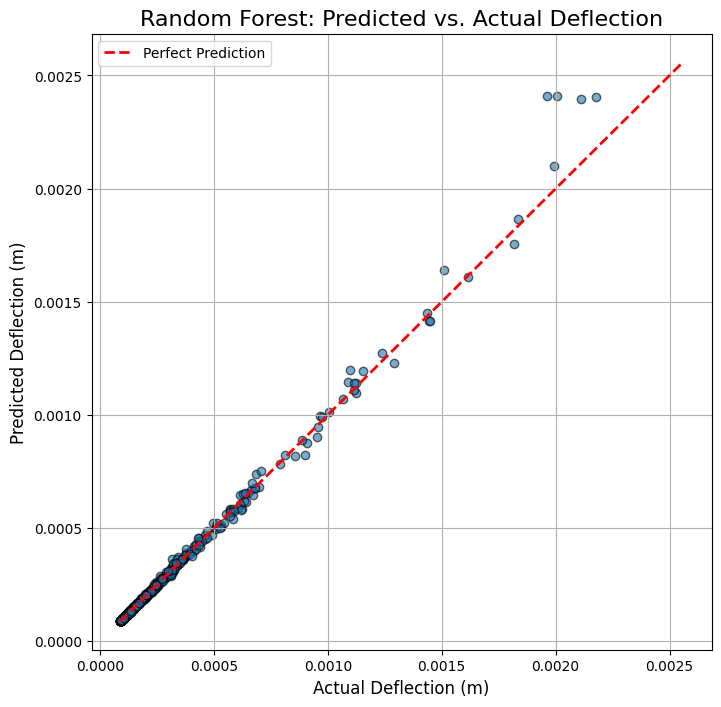

In [10]:
# --- Make Predictions ---
y_pred = model.predict(X_test)
# --- Generate the Plot ---
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', lw=2, label='Perfect Prediction')
plt.title('Random Forest: Predicted vs. Actual Deflection', fontsize=16)
plt.xlabel('Actual Deflection (m)', fontsize=12)
plt.ylabel('Predicted Deflection (m)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

In [11]:
# --- 5. Save the Final Model ---
print("\nSaving RF model...")
joblib.dump(model, 'random_forest_surrogate_model.joblib')
print("Model saved as 'random_forest_surrogate_model.joblib'")


Saving RF model...
Model saved as 'random_forest_surrogate_model.joblib'
